## Wrangling and Analyze the tweets of We Rate Dogs twitter account

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Data Assessing</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#Storing">Storing</a></li>
<li><a href="#Analysis">Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
Data splitted in three tables: tweets_archive, tweets_image_predictions and tweets_counts

<a id='Gathering'></a>
## Data Gathering

In [1]:
import pandas as pd
import requests as req
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json

1- Tweets Archive

In [2]:
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2- Tweets Images Predictions

In [4]:
image_predictions_response = req.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
tweets_image_predictions = pd.read_csv(io.StringIO(image_predictions_response.content.decode('utf-8')),sep = '\t')

In [6]:
tweets_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3- Tweets Counts

Tweets counts can be gathering using twitter API, it came as JSON data and saved in tweet_json.txt file

In [7]:
__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('tweet-json.txt')))

In [8]:
with open (os.path.join(__location__,'tweet-json.txt')) as file:
    tweets_json_txt = file.read().splitlines()

In [9]:
tweets_json = []
for line in tweets_json_txt:
    tweets_json.append(json.loads(line))

In [10]:
tweets_json[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [11]:
df_list =[]
for jsonLine in tweets_json:
    tweet_id = jsonLine['id']
    retweet_count = jsonLine['retweet_count']
    favorite_count = jsonLine['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
tweets_counts = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
tweets_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='Assessing'></a>
## Data Assessing

Both visual and programmatic assessments can be used to assess the data and find quality and tidiness issues

### 1 - Tweets Archive Table

In [13]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
tweets_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
pd.options.display.max_colwidth = 1000
tweets_archive[tweets_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [16]:
tweets_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Rascal       1
Liam         1
Luther       1
Livvie       1
Kane         1
Name: name, Length: 957, dtype: int64

In [17]:
tweets_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### General

#### Tidiness
1 - Tweets counts should be part of the tweets archive table

#### Quality
2- Erroneous tweet id datatype <br>

### Tweets archive table

#### Tidiness
1 - Dog stage splitted in multi columns 

#### Quality
1 - Some data are for replies and retweets not for original tweets <br>
2 - Source column is not readable <br>
3 - Erroneous Time stamp datatype <br>
4 - Missing expanded urls <br>
5 - Some dogs names are incorrect <br>
6 - Some tweets have incorrect rating: <br>
  - 960/00 rating correct rating is 13/10
  - 11/15 rating there is no rating in this tweet
  - 24/7 rating, there is no rating in this tweet
  - 9/11 rating, correct rating is 14/10
  - 4/20 rating, correct rating is 13/10
  - 50/50 rating, correct rating 11/10
  - 7/11 rating, correct rating is 10/10
  - 1/2 rating, correct rating is 9/10 

### 2 - Tweets Images Predictions Table

In [18]:
tweets_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweets_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Tweets image predictions table
#### Quality
1 - Coulmns names are not clear
#### Tidiness
1 - Add the most accurate prediction to tweets_archive table

### 3 - Tweets Counts table

In [20]:
tweets_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
tweets_counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<a id='Cleaning'></a>
## Data Cleaning

In [22]:
tweets_archive_clean = tweets_archive.copy()
tweets_image_predictions_clean = tweets_image_predictions.copy()
tweets_counts_clean = tweets_counts.copy()

### General

Tweets counts should be part of the tweets archive table

#### Define
Merge the tweets_counts columns to the tweets_archive table, joining on tweet id

#### Code

In [23]:
tweets_archive_clean = pd.merge(tweets_archive_clean, tweets_counts_clean,
                            on=['tweet_id'], how='left')

#### Test

In [24]:
tweets_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774.0,41048.0


Erroneous tweet id datatype in all tables

#### Define
Convert tweet id type to string

#### Code

In [25]:
tweets_archive_clean.tweet_id = tweets_archive_clean.tweet_id.astype(str)
tweets_image_predictions_clean.tweet_id = tweets_image_predictions_clean.tweet_id.astype(str)

#### Test

In [26]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
tweets_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tweets Archive Table

1 - Some data are for replies and retweets not for original tweets 

##### Define
Get tweets ids for replied and retweeted data then remove them from all tables, then drop replies and retweets data columns

#### Code

In [28]:
replies_ids = tweets_archive[tweets_archive['in_reply_to_status_id'].notnull()]['tweet_id']
replies_indecies = replies_ids.index

tweets_archive_clean.drop(replies_indecies,inplace = True)

retweets_ids = tweets_archive[tweets_archive['retweeted_status_id'].notnull()]['tweet_id']
retweets_indecies = retweets_ids.index

tweets_archive_clean.drop(retweets_indecies,inplace = True)

In [29]:
replies_image_predictions_indecies = tweets_image_predictions[tweets_image_predictions['tweet_id'].isin(replies_ids)].index

tweets_image_predictions_clean.drop(replies_image_predictions_indecies,inplace = True)

retweets_image_predictions_indecies = tweets_image_predictions[tweets_image_predictions['tweet_id'].isin(retweets_ids)].index

tweets_image_predictions_clean.drop(retweets_image_predictions_indecies,inplace = True)

In [30]:
replies_columns = ['in_reply_to_status_id','in_reply_to_user_id']
tweets_archive_clean.drop(replies_columns,axis = 1, inplace= True)

retweets_columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
tweets_archive_clean.drop(retweets_columns,axis = 1, inplace= True)

#### Test

In [31]:
tweets_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774.0,41048.0


2 - Source column is not readable

##### Define
Replace each source with just its last part

#### Code

In [32]:
tweets_archive_clean['source'] = tweets_archive['source'].str.strip('</a>')

In [33]:
tweets_archive_clean['source'] = tweets_archive_clean['source'].str.split('>').str[-1]

#### Test

In [34]:
tweets_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

3 - Erroneous Time stamp datatype

#### Define
Remove '+0000' from each timestamp and then convert its type to datetime type

#### Code

In [35]:
tweets_archive_clean['timestamp'] = tweets_archive['timestamp'].str[:-6]

In [36]:
tweets_archive_clean['timestamp'] = pd.to_datetime(tweets_archive_clean['timestamp'])

#### Test

In [37]:
tweets_archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

4 - Missing expanded urls

#### Define
Fill missing urls with 'https://twitter.com/dog_rates/status/' concated with tweet id

#### Code

In [38]:
for i in tweets_archive_clean[tweets_archive_clean['expanded_urls'].isnull()].index:
         tweets_archive_clean['expanded_urls'] = tweets_archive_clean['expanded_urls'].replace(tweets_archive_clean.loc[i]['expanded_urls'],'https://twitter.com/dog_rates/status/'+tweets_archive_clean.loc[i]['tweet_id'])

#### Test

In [39]:
tweets_archive_clean[tweets_archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


5 - Some dogs names are incorrect

#### Define
Replace incorrect names with 'None'

#### Code

In [40]:
tweets_archive_clean[tweets_archive_clean['name'].str.islower()].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
actually         2
not              2
getting          2
infuriating      1
space            1
unacceptable     1
his              1
incredibly       1
light            1
all              1
by               1
my               1
old              1
officially       1
mad              1
such             1
life             1
this             1
Name: name, dtype: int64

In [41]:
for i in tweets_archive_clean[tweets_archive_clean['name'].str.islower()].index:
         tweets_archive_clean['name'] = tweets_archive_clean['name'].replace(tweets_archive_clean.loc[i]['name'],'None')

#### Test

In [42]:
tweets_archive_clean.name.value_counts()

None       707
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Buckley      1
Divine       1
Akumi        1
Angel        1
Mimosa       1
Name: name, Length: 930, dtype: int64

6 - Some tweets have incorrect rating: <br>
  - 960/00 rating correct rating is 13/10
  - 11/15 rating there is no rating in this tweet
  - 24/7 rating, there is no rating in this tweet
  - 9/11 rating, correct rating is 14/10
  - 4/20 rating, correct rating is 13/10
  - 50/50 rating, correct rating 11/10
  - 7/11 rating, correct rating is 10/10
  - 1/2 rating, correct rating is 9/10

#### Define
Replace each incorrect rating with correct one and drop the tweets that has no rating

#### Code

In [43]:
def replace_rating(data_frame,old_numerator, old_denominator,new_numerator, new_denominator):
       data_frame.loc[(data_frame.rating_numerator == old_numerator) & (data_frame.rating_denominator == old_denominator) ,'rating_numerator']=new_numerator
       data_frame.loc[(data_frame.rating_numerator == new_numerator) & (data_frame.rating_denominator == old_denominator) ,'rating_denominator']=new_denominator

In [44]:
replace_rating(tweets_archive_clean,960,00,13,10)
replace_rating(tweets_archive_clean,9,11,14,10)
replace_rating(tweets_archive_clean,4,20,13,10)
replace_rating(tweets_archive_clean,50,50,11,10)
replace_rating(tweets_archive_clean,7,11,10,10)
replace_rating(tweets_archive_clean,1,2,9,10)

In [45]:
invalid_rating_tweet_id = tweets_archive_clean[(tweets_archive_clean.rating_numerator == 11) & (tweets_archive_clean.rating_denominator == 15)]['tweet_id']
tweets_archive_clean.drop(invalid_rating_tweet_id.index,inplace = True)
tweets_image_predictions_clean.drop(tweets_image_predictions_clean[tweets_image_predictions_clean['tweet_id'].isin(invalid_rating_tweet_id)].index,inplace= True)
tweets_counts_clean.drop(tweets_counts_clean[tweets_counts_clean['tweet_id'].isin(invalid_rating_tweet_id)].index,inplace= True)

In [46]:
invalid_rating_tweet_id = tweets_archive_clean[(tweets_archive_clean.rating_numerator == 24) & (tweets_archive_clean.rating_denominator == 7)]['tweet_id']
tweets_archive_clean.drop(invalid_rating_tweet_id.index,inplace = True)
tweets_image_predictions_clean.drop(tweets_image_predictions_clean[tweets_image_predictions_clean['tweet_id'].isin(invalid_rating_tweet_id)].index,inplace= True)
tweets_counts_clean.drop(tweets_counts_clean[tweets_counts_clean['tweet_id'].isin(invalid_rating_tweet_id)].index,inplace= True)

#### Test

In [47]:
tweets_archive_clean[tweets_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,3716.0,13518.0
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,2539.0,5316.0
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None,1434.0,4196.0
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,829.0,3062.0
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None,636.0,2529.0
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None,721.0,2634.0
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,None,None,None,None,None,1028.0,3201.0
1433,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None,1552.0,3748.0
1635,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None,1563.0,4225.0
1779,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None,1104.0,3323.0


#### Tidiness
1 - Dog stage splitted in multi columns

#### Define

Melt dog stage columns in one column

#### Code

In [48]:
#Get each stage count to ensure that they will remain same after melting
tweets_archive_clean.doggo.value_counts()

None     2013
doggo      83
Name: doggo, dtype: int64

In [49]:
tweets_archive_clean.floofer.value_counts()

None       2086
floofer      10
Name: floofer, dtype: int64

In [50]:
tweets_archive_clean.pupper.value_counts()

None      1866
pupper     230
Name: pupper, dtype: int64

In [51]:
tweets_archive_clean.puppo.value_counts()

None     2072
puppo      24
Name: puppo, dtype: int64

In [52]:
tweets_archive_clean = pd.melt(tweets_archive_clean, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name','retweet_count','favorite_count'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'stage', value_name = 'dog_stage')

In [53]:
tweets_archive_clean = tweets_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [54]:
tweets_archive_clean.drop('stage',axis =1,inplace =True)

#### Test

In [55]:
tweets_archive_clean.dog_stage.value_counts()

None       1760
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [56]:
tweets_archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
2417,823699002998870016,2017-01-24 01:08:40,Twitter for iPhone,This is Winston. The goggles make him a superhero. Protects the entire city from criminals unless they rub his belly really well. 12/10 https://t.co/yCydYURYEL,https://twitter.com/dog_rates/status/823699002998870016/photo/1,12,10,Winston,2772.0,13826.0,None
2361,832397543355072512,2017-02-17 01:13:34,Twitter for iPhone,This is Eevee. She wants to see how you're doing. Just checkin pup on you. She hopes you're doing okay. 12/10 extremely good girl https://t.co/nqAJGCHKEt,"https://twitter.com/dog_rates/status/832397543355072512/photo/1,https://twitter.com/dog_rates/status/832397543355072512/photo/1",12,10,Eevee,2548.0,13126.0,None
237,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12,10,Meera,5237.0,21029.0,doggo
3198,706291001778950144,2016-03-06 01:31:11,Twitter for iPhone,When you're just relaxin and having a swell time but then remember you have to fill out the FAFSA ...11/10 https://t.co/qy33OBcexg,"https://twitter.com/dog_rates/status/706291001778950144/photo/1,https://twitter.com/dog_rates/status/706291001778950144/photo/1",11,10,None,522.0,1861.0,None
5325,703407252292673536,2016-02-27 02:32:12,Twitter for iPhone,This pupper doesn't understand gates. 10/10 so close https://t.co/GUbFF4o6dZ,https://twitter.com/dog_rates/status/703407252292673536/photo/1,10,10,None,786.0,2685.0,pupper
3342,693647888581312512,2016-01-31 04:11:58,Twitter for iPhone,What kind of person sends in a pic without a dog in it? So churlish. Neat rug tho 7/10 https://t.co/LSTAwTdTaw,https://twitter.com/dog_rates/status/693647888581312512/photo/1,7,10,None,673.0,2961.0,None
3932,670786190031921152,2015-11-29 02:07:44,Twitter for iPhone,This is Creg. You offered him a ride to work but you're late and you just missed his exit. 8/10 https://t.co/3r7wznfuoa,https://twitter.com/dog_rates/status/670786190031921152/photo/1,8,10,Creg,218.0,640.0,None
5070,736392552031657984,2016-05-28 03:04:00,Vine - Make a Scene,Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,https://vine.co/v/iEggaEOiLO3,13,10,None,8407.0,19450.0,pupper
3462,686034024800862208,2016-01-10 03:57:12,Twitter for iPhone,Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D,https://twitter.com/dog_rates/status/686034024800862208/photo/1,12,10,None,1324.0,3424.0,None
3007,729463711119904772,2016-05-09 00:11:16,Twitter for iPhone,Meet Pupcasso. You can't afford his art. 13/10 talented af https://t.co/f2VUpy4WO0,https://twitter.com/dog_rates/status/729463711119904772/photo/1,13,10,Pupcasso,2586.0,6340.0,None


In [57]:
#reset indecies
tweets_archive_clean = tweets_archive_clean.sort_values(['tweet_id'],ascending=False).reset_index(drop=True)

In [58]:
tweets_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853.0,39467.0,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514.0,33819.0,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328.0,25461.0,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964.0,42908.0,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774.0,41048.0,None


### Tweets Images Predictions Table

1 - Coulmns names are not clear

#### Define 
Rename columns 

#### Code

In [59]:
tweets_image_predictions_clean = tweets_image_predictions_clean.rename(columns={'p1': 'first_prediction','p1_conf': 'first_prediction_confidence_interval','p1_dog':'is_first_prediction_a_breed'
                                                                   , 'p2': 'second_prediction','p2_conf': 'second_prediction_confidence_interval','p2_dog':'is_second_prediction_a_breed'
                                                                   , 'p3': 'third_prediction','p3_conf': 'third_prediction_confidence_interval','p3_dog':'is_third_prediction_a_breed'})

#### Test

In [60]:
tweets_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence_interval,is_first_prediction_a_breed,second_prediction,second_prediction_confidence_interval,is_second_prediction_a_breed,third_prediction,third_prediction_confidence_interval,is_third_prediction_a_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Tidiness
1 - Add the most accurate prediction to the tweets_archive table

#### Define
Add breed prediction column with the larger confidence then merge it to the tweets_archive table

#### Code

In [61]:
tweets_image_predictions_clean['breed_prediction'] = tweets_image_predictions_clean.apply(lambda x: x['first_prediction'] if x['is_first_prediction_a_breed'] 
                   else x['second_prediction'] if x['is_second_prediction_a_breed'] 
                   else x['third_prediction'] if x['is_third_prediction_a_breed'] 
                   else 'None',axis=1)

In [62]:
tweets_archive_clean = pd.merge(tweets_archive_clean,tweets_image_predictions_clean[['tweet_id','breed_prediction']],on=['tweet_id'],how='left')

#### Test

In [63]:
tweets_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,breed_prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853.0,39467.0,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514.0,33819.0,None,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328.0,25461.0,None,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964.0,42908.0,None,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774.0,41048.0,None,basset


<a id='Storing'></a>
## Storing

In [64]:
tweets_archive_clean.to_csv('twitter_archive_master.csv',index=False)

In [65]:
tweets_image_predictions_clean.to_csv('tweets_image_predictions_clean.csv',index=False)

<a id='Analysis'></a>
## Analysis

In [66]:
tweets_master = pd.read_csv('twitter_archive_master.csv')
plt.rcParams['font.size'] = 12

Prepare data for analyzing:

- Add rating column

In [67]:
tweets_master['rating'] = tweets_master['rating_numerator']/tweets_master['rating_denominator']

In [68]:
tweets_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,breed_prediction,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853.0,39467.0,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514.0,33819.0,None,Chihuahua,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328.0,25461.0,None,Chihuahua,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964.0,42908.0,None,Labrador_retriever,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774.0,41048.0,None,basset,1.2


### Below there are some analysis with a comment on each insight

In [93]:
tweets_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,2.096000e+03,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000
mean,7.365239e+17,12.177004,10.429389,2842.233779,8982.359256,1.169418
std,6.709809e+16,40.364114,6.583901,4710.290609,12202.365447,3.966472
min,6.660209e+17,0.000000,10.000000,16.000000,81.000000,0.000000
25%,6.768177e+17,10.000000,10.000000,643.750000,2045.750000,1.000000
50%,7.097095e+17,11.000000,10.000000,1404.000000,4195.500000,1.100000
75%,7.874779e+17,12.000000,10.000000,3286.500000,11425.000000,1.200000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,177.600000


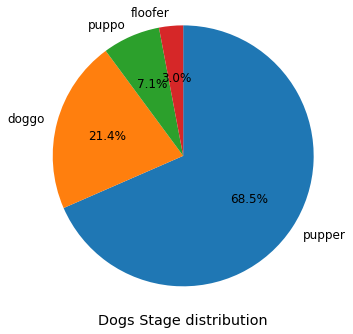

In [69]:
sorted_counts = tweets_master['dog_stage'].value_counts()
sorted_counts.drop('None',inplace=True)

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,radius = 1.5,autopct='%1.1f%%');
plt.title('Dogs Stage distribution', y=-0.3);

#### Pupper is the most popular dog stage in this dataset

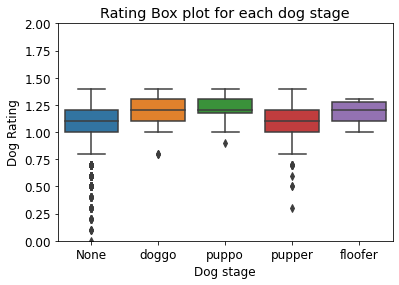

In [82]:
sns.boxplot(data=tweets_master, x='dog_stage', y='rating');
plt.ylim([0,2]);
plt.xlabel('Dog stage');
plt.ylabel('Dog Rating');
plt.title('Rating Box plot for each dog stage');

#### All dog stages have similar mean ratings

[Text(0.5, 0, 'Dog Rating'), Text(0, 0.5, 'Favorites count')]

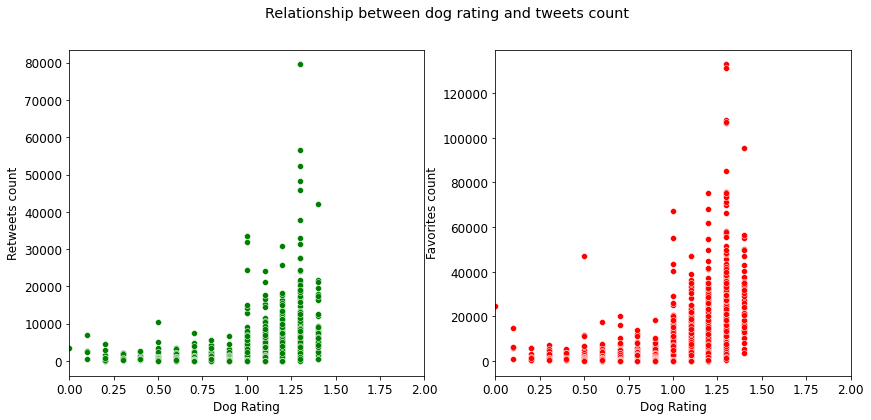

In [86]:
fig,axes = plt.subplots(1,2,figsize=(14,6))

fig.suptitle('Relationship between dog rating and tweets count')

sns.scatterplot(ax=axes[0],data=tweets_master, x='rating', y='retweet_count',color = 'green');
axes[0].set_xlim(0,2);
axes[0].set(xlabel='Dog Rating', ylabel='Retweets count')

sns.scatterplot(ax=axes[1],data=tweets_master, x='rating', y='favorite_count',color = 'red');
axes[1].set_xlim(0,2);
axes[1].set(xlabel='Dog Rating', ylabel='Favorites count')


#### High dogs ratings have a better chance to get more retweets and favorites

In [72]:
tweets_master.breed_prediction.value_counts()

None                    305
golden_retriever        155
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
                       ... 
clumber                   1
silky_terrier             1
Irish_wolfhound           1
Scotch_terrier            1
Bouvier_des_Flandres      1
Name: breed_prediction, Length: 114, dtype: int64

#### Retriever breed is the most popular breed in this dataset, also there is 113 breed predicted.

In [73]:
predictions_mean_rating = tweets_master.groupby('breed_prediction')['rating'].mean().sort_values(ascending=False)
predictions_mean_rating.drop('None',inplace = True)
predictions_mean_rating

breed_prediction
clumber                        2.700000
Bouvier_des_Flandres           1.300000
Pomeranian                     1.253659
Saluki                         1.250000
briard                         1.233333
                                 ...   
Ibizan_hound                   0.925000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
soft-coated_wheaten_terrier    0.850000
Japanese_spaniel               0.500000
Name: rating, Length: 113, dtype: float64

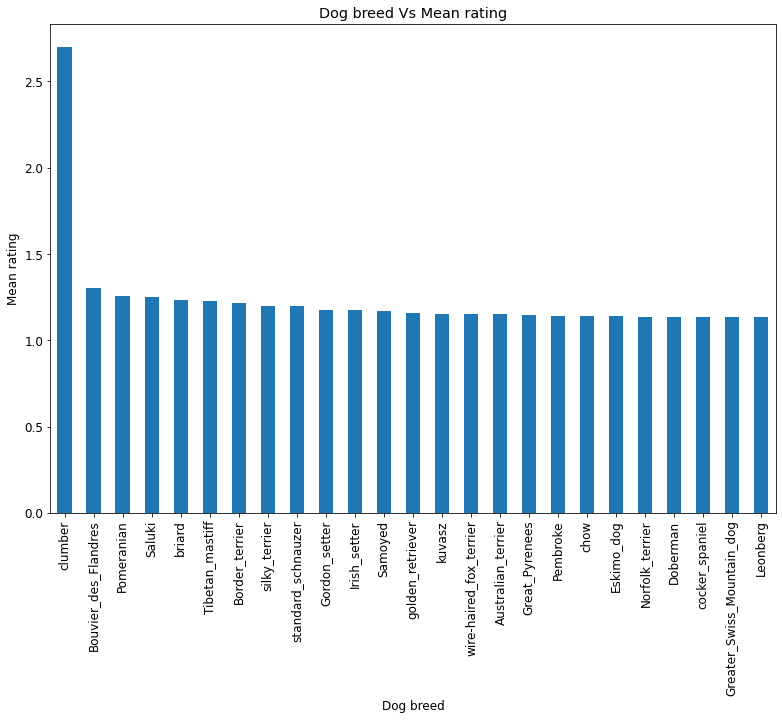

In [88]:
largest_mean_rating_predictions = predictions_mean_rating.nlargest(25)
plt.figure(figsize = [13,9])
largest_mean_rating_predictions.plot(kind='bar');
plt.xlabel('Dog breed');
plt.ylabel('Mean rating');
plt.title('Dog breed Vs Mean rating');

#### Clumber breed has a large mean rating with a big gap between its mean and other breeds means!

Check why?

In [75]:
tweets_master[tweets_master.breed_prediction == 'clumber']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,breed_prediction,rating
585,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,1885.0,7320.0,pupper,clumber,2.7


It has wrong rating! this must has been cleaned

In [76]:
breeds_mean_retweets = tweets_master.groupby('breed_prediction')['retweet_count'].mean().sort_values(ascending=False)
breeds_mean_retweets.drop('None',inplace = True)
breeds_mean_favorites = tweets_master.groupby('breed_prediction')['favorite_count'].mean().sort_values(ascending=False)
breeds_mean_favorites.drop('None',inplace = True)

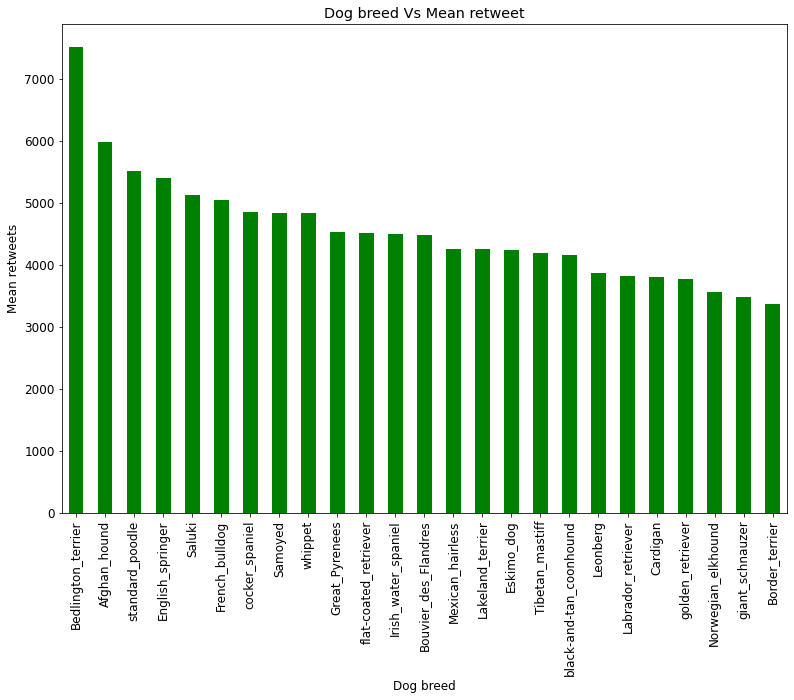

In [89]:
largest_mean_retweets_breeds = breeds_mean_retweets.nlargest(25)

plt.figure(figsize = [13,9])

largest_mean_retweets_breeds.plot(kind='bar',color = 'green');
plt.xlabel('Dog breed');
plt.ylabel('Mean retweets');
plt.title('Dog breed Vs Mean retweet');

#### Bedlington terrier has the most mean retweets counts

In [78]:
tweets_master[tweets_master.breed_prediction == 'Bedlington_terrier']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,breed_prediction,rating
135,860524505164394496,2017-05-05 16:00:04,Twitter for iPhone,This is Carl. He likes to dance. Doesn't care what you think about it. 13/10 h*ckin confident pup https://t.co/C2zHcNIu4I,https://twitter.com/dog_rates/status/860524505164394496/photo/1,13,10,Carl,5698.0,24678.0,None,Bedlington_terrier,1.3
184,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,3444.0,17618.0,None,Bedlington_terrier,0.6
292,828381636999917570,2017-02-05 23:15:47,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,https://twitter.com/dog_rates/status/828381636999917570/photo/1,14,10,Doobert,2554.0,13864.0,doggo,Bedlington_terrier,1.4
740,752334515931054080,2016-07-11 02:51:40,Twitter for iPhone,Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx) https://t.co/jwd0j6oWLE,https://twitter.com/dog_rates/status/752334515931054080/video/1,8,10,None,1263.0,4238.0,doggo,Bedlington_terrier,0.8
868,738184450748633089,2016-06-02 01:44:22,Twitter for iPhone,"For the last time, we only rate dogs. Pls stop sending other animals like this Duck-Billed Platypus. Thank you. 9/10 https://t.co/twxYcPOafl",https://twitter.com/dog_rates/status/738184450748633089/photo/1,9,10,None,1360.0,4727.0,None,Bedlington_terrier,0.9
1527,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,https://twitter.com/dog_rates/status/678399652199309312/video/1,12,10,None,30742.0,61794.0,None,Bedlington_terrier,1.2


The high mean of retweets counts for Bedlington terrier comes from 30742 retweets for one tweet

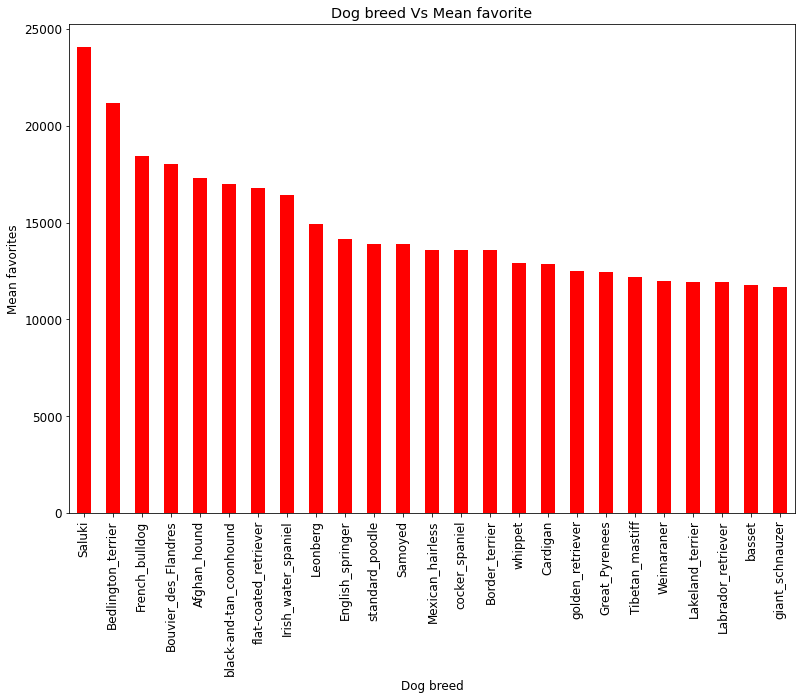

In [90]:
largest_mean_favorites_breeds = breeds_mean_favorites.nlargest(25)
plt.figure(figsize = [13,9])
largest_mean_favorites_breeds.plot(kind='bar',color = 'red');
plt.xlabel('Dog breed');
plt.ylabel('Mean favorites');
plt.title('Dog breed Vs Mean favorite');

#### Saluki has the highest mean favorites counts

In [80]:
tweets_master[tweets_master.breed_prediction == 'Saluki']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,breed_prediction,rating
50,881666595344535552,2017-07-03 00:11:11,Twitter for iPhone,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,11099.0,51522.0,None,Saluki,1.3
70,877316821321428993,2017-06-21 00:06:44,Twitter for iPhone,"Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc","https://twitter.com/dog_rates/status/877316821321428993/photo/1,https://twitter.com/dog_rates/status/877316821321428993/photo/1",13,10,Dante,5414.0,27907.0,None,Saluki,1.3
363,817120970343411712,2017-01-05 21:29:55,Twitter for iPhone,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,https://twitter.com/dog_rates/status/817120970343411712/photo/1,13,10,None,3011.0,13367.0,None,Saluki,1.3
764,750056684286914561,2016-07-04 20:00:23,TweetDeck,This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,https://twitter.com/dog_rates/status/750056684286914561/photo/1,11,10,Jameson,1011.0,3444.0,None,Saluki,1.1


The high mean of favorites counts for Saluki comes from 51522 favorites for one tweet